## Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df=pd.read_csv("fire_dataset.csv")
df

,Fire Level,Smoke Level,FFMC,ISI,wind,DC,Fire Type
0,879,730,86.2,5.1,6.7,94.3,a
1,268,588,90.6,6.7,0.9,669.1,d
2,420,760,90.6,6.7,1.3,686.9,a
3,733,418,91.7,9.0,4.0,77.5,k
4,303,601,89.3,9.6,1.8,102.2,a
...,...,...,...,...,...,...,...
258,305,165,91.4,10.6,4.5,601.4,a
259,305,165,91.4,10.6,4.5,601.4,a
260,305,165,91.4,10.6,4.5,601.4,a
261,305,165,91.4,10.6,4.5,601.4,a


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Fire Level'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Smoke Level'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['FFMC'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['ISI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Fire Level'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Smoke Level'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['FFMC'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['ISI'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Fire Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Fire Level', 'Smoke Level'], ['Smoke Level', 'FFMC'], ['FFMC', 'ISI'], ['ISI', 'wind']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Fire Level', 'Fire Type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Smoke Level', 'Fire Type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['FFMC', 'Fire Type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['ISI', 'Fire Type'], **{'inner': 'stick'})
chart

In [ ]:
# df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [98]:
df

,Fire Level,Smoke Level,FFMC,ISI,wind,DC,Fire Type
0,879,730,86.2,5.1,6.7,94.3,a
1,268,588,90.6,6.7,0.9,669.1,d
2,420,760,90.6,6.7,1.3,686.9,a
3,733,418,91.7,9.0,4.0,77.5,k
4,303,601,89.3,9.6,1.8,102.2,a
...,...,...,...,...,...,...,...
258,305,165,91.4,10.6,4.5,601.4,a
259,305,165,91.4,10.6,4.5,601.4,a
260,305,165,91.4,10.6,4.5,601.4,a
261,305,165,91.4,10.6,4.5,601.4,a


<ipython-input-99-70070373a69b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap


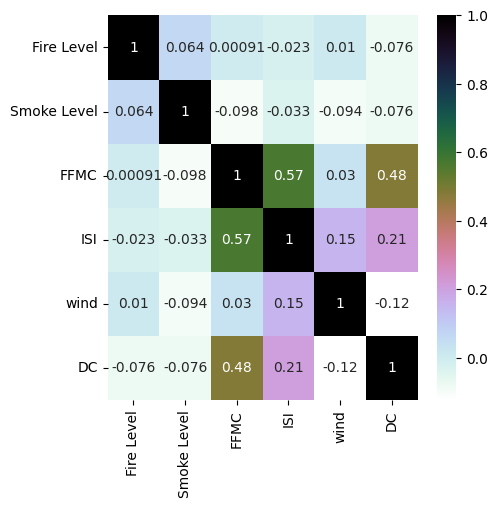

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap
plt.show()

## Data Visualization

In [65]:
df.columns

Index(['Fire Level', 'Smoke Level', 'FFMC', 'ISI', 'wind', 'DC', 'Fire Type'], dtype='object')

In [8]:
mag="magma"

<Axes: xlabel='Fire Type', ylabel='count'>

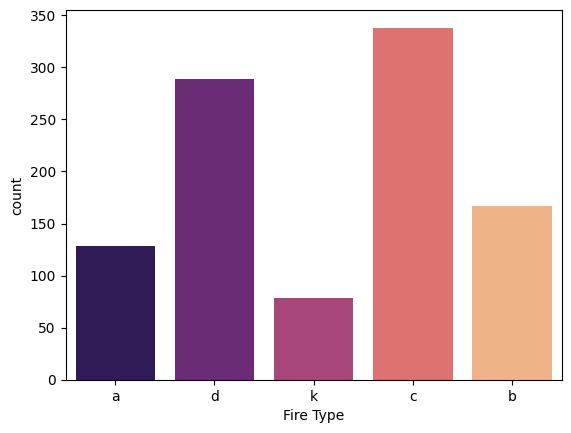

In [33]:
sns.countplot(x="Fire Type",data=df,palette=mag)

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
X = df.drop(columns='Fire Type', axis =1)
Y = df['Fire Type']

In [101]:
# training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [102]:
print(X.shape, X_train.shape, X_test.shape)

(263, 6) (210, 6) (53, 6)


## Logistic Regression model

In [83]:
model = LogisticRegression()

In [104]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)

print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  80.0


In [110]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)

print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  75.0


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dis_tree = DecisionTreeClassifier()
dis_tree.fit(X_train, Y_train)
prediction_dis = dis_tree.predict(X_test)
print('The accuracy of Decision Tree is: ', test_data_accuracy)

The accuracy of Decision Tree is:  0.75


In [113]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  78.0


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_dis))

              precision    recall  f1-score   support

           a       0.31      0.31      0.31        26
           b       0.22      0.24      0.23        33
           c       0.38      0.37      0.38        67
           d       0.31      0.33      0.32        58
           k       0.00      0.00      0.00        16

    accuracy                           0.30       200
   macro avg       0.24      0.25      0.25       200
weighted avg       0.29      0.30      0.30       200

